In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load and prepare training data

Get Calinfornia Housing data and split into train, test and validation sets.

In [3]:
housing = fetch_california_housing()

# test_size is default to 0.25
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [4]:
X_train_full.shape, X_train.shape, X_valid.shape, X_test.shape

((15480, 8), (11610, 8), (3870, 8), (5160, 8))

## Apply scaling

In [5]:
X_train = StandardScaler().fit_transform(X_train)
X_valid = StandardScaler().fit_transform(X_valid)
X_test = StandardScaler().fit_transform(X_test)

In [6]:
print(housing['feature_names'], housing['target_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] ['MedHouseVal']


## Basic Regression Model with Keras

- Try with 1 hidden layer with 30 neurons
- The loss function will be mse
- Optimizer sgd

In [25]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(30, input_shape = X_train.shape[1:], activation = 'relu'), # just using shape from training set
        tf.keras.layers.Dense(1)
])


In [30]:
model.compile(loss = 'mse', optimizer = 'sgd')

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 30, verbose= False)

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] 
y_pred = model.predict(X_new)

print(y_test[:3])
print(y_pred.reshape(1, -1))

162/162 [==============================] - 0s 494us/step - loss: 0.3531
[1.625 2.408 4.869]
[[1.5493028 2.465497  2.879759 ]]


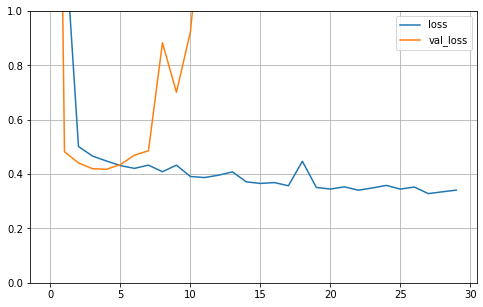

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Building Non-Sequential Model

In this case, use the **Wide & Deep Model**:

- 2 Hidden Layers
- Input Layer is also combined with the output of the last hidden layer (connecting all inputer layer to output layer) 

The advantage of **Wide & Deep Model** makes it possible for model to learn both simple rules and deep patterns. 

In [7]:
tf.keras.backend.clear_session()

input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1_ = keras.layers.Dense(30, activation = "relu")(input_)
hidden2_ = keras.layers.Dense(30, activation = "relu")(hidden1_)
concat = keras.layers.Concatenate()([input_, hidden2_])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

In [8]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [9]:
model.compile(loss = 'mse', optimizer = 'sgd')

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 30)

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] 
y_pred = model.predict(X_new)

print(y_test[:3])
print(y_pred.reshape(1, -1))

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: 1.1618 - val_loss: 4.6243
Epoch 2/30
363/363 [==============================] - 0s 824us/step - loss: 1.3024 - val_loss: 0.4821
Epoch 3/30
363/363 [==============================] - 0s 815us/step - loss: 0.5015 - val_loss: 0.4410
Epoch 4/30
363/363 [==============================] - 0s 730us/step - loss: 0.4664 - val_loss: 0.4197
Epoch 5/30
363/363 [==============================] - 0s 730us/step - loss: 0.4481 - val_loss: 0.4177
Epoch 6/30
363/363 [==============================] - 0s 851us/step - loss: 0.4312 - val_loss: 0.4350
Epoch 7/30
363/363 [==============================] - 0s 678us/step - loss: 0.4209 - val_loss: 0.4698
Epoch 8/30
363/363 [==============================] - 0s 702us/step - loss: 0.4330 - val_loss: 0.4856
Epoch 9/30
363/363 [==============================] - 0s 815us/step - loss: 0.4087 - val_loss: 0.8831
Epoch 10/30
363/363 [==============================] - 0s 815us/step - loss: 0.4328 